In [7]:
import numpy as np
import tensorflow as tf
from collections import Counter
from collections import namedtuple
from datetime import datetime
from nltk.corpus import words
import pandas as pd
import json
import os
import random
import sys
import re

from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (20.0, 7.0)

## Visualizing the label distribution

In [8]:
ImageMetadata = namedtuple("ImageMetadata",["filename", "annotation"])
dataset = []
with open("annotations.json", 'r') as f:
    json_data = json.load(f)
for data in json_data:
    filename = data["image"]
    annotation = data["annotation"]
    dataset.append(ImageMetadata(filename, annotation))
print("Size of the dataset : %d images" % len(dataset))

Size of the dataset : 25000 images


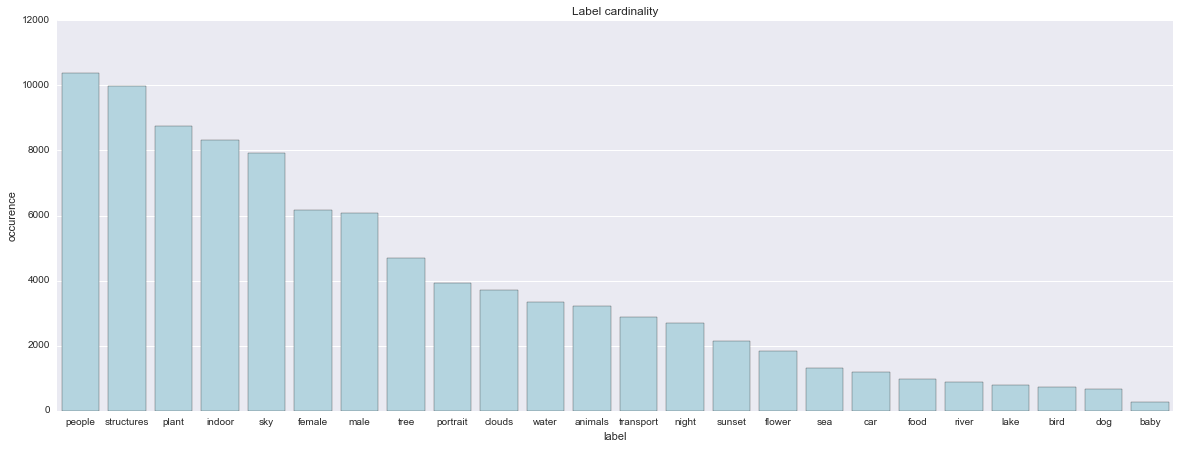

In [9]:
labels = [x for image in dataset for x in image.annotation]
counter = Counter(labels)
x = [c[0] for c in counter.most_common()]
y = [c[1] for c in counter.most_common()]

sns.barplot(x, y, color="lightblue")
plt.xlabel("label")
plt.ylabel("occurence")
plt.title("Label cardinality")

## Number of labels per image

Average number of labels per image : 3.716240
Median number of labels per image : 4
Max number of labels per image : 14


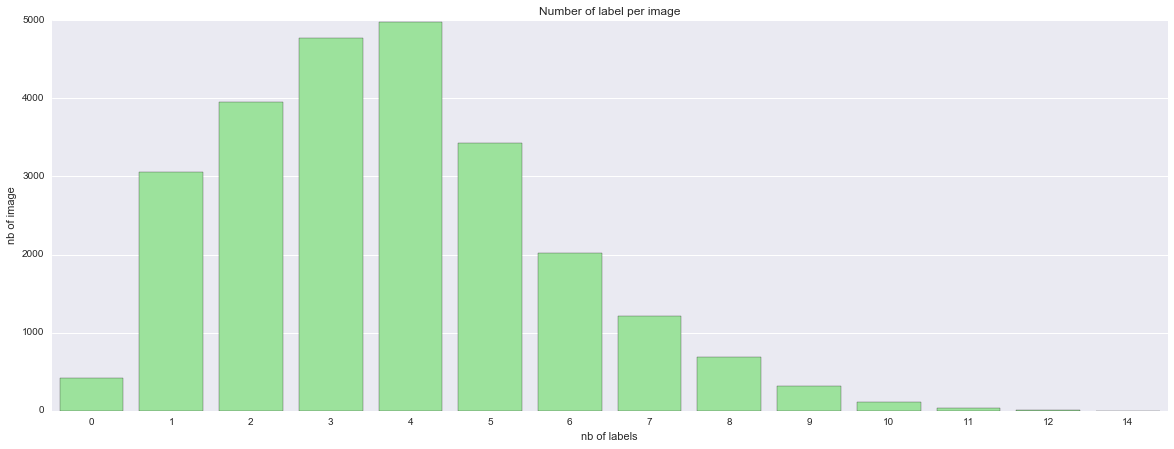

In [10]:
labels_per_image = [len(image.annotation) for image in dataset]
counter = Counter(labels_per_image)
x = [c[0] for c in counter.most_common()]
y = [c[1] for c in counter.most_common()]

sns.barplot(x, y, color="lightgreen")
plt.ylabel("nb of image")
plt.xlabel("nb of labels")
plt.title("Number of label per image")
print("Average number of labels per image : %f"% np.mean(labels_per_image))
print("Median number of labels per image : %d" % np.median(labels_per_image))
print("Max number of labels per image : %d" % max(labels_per_image))

## Label correlations

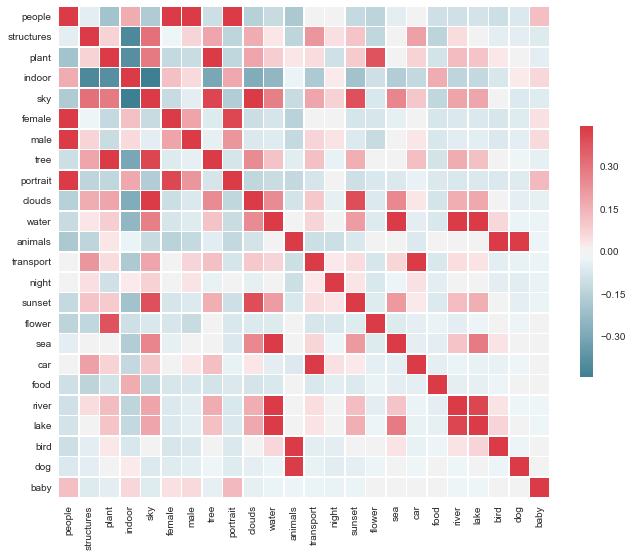

In [21]:
annotations = [image.annotation for image in dataset]
# create a dictionnary of labels and sort labels in decreasing cardinality order
counter = Counter(labels)
word_counts = [x for x in counter.items()]
word_counts.sort(key=lambda x: x[1], reverse=True)
# associate id with label in vocabulary
reverse_vocab = [x[0] for x in word_counts]
vocab = dict([(x, y) for (y, x) in enumerate(reverse_vocab)])
# Transform the annotations_ids into a matrix of binary vectors
annotations_ids = [[vocab[label] for label in annotation] for annotation in annotations]
annotations_bin = np.zeros((len(annotations_ids), len(vocab)))
for x, annot in enumerate(annotations_ids):
    for y in annot:
        annotations_bin[x, y]=1
# Put the matrix into pandas dataframe
df = pd.DataFrame(annotations_bin, columns=reverse_vocab)
# create correlation matrix
corr = df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Image analysis

In [22]:
from PIL import Image
from fnmatch import fnmatch

heights = []
widths = []
for f in os.listdir('mirflickr'):
    if fnmatch(f, '.*'):
        continue
    if os.path.isdir(os.path.join('mirflickr', f)):
        continue
    image_path = os.path.join('mirflickr',f)
    with Image.open(image_path) as im:
        width, height = im.size
        widths.append(width)
        heights.append(height)

Average height : 398.520560
Average width : 462.138920


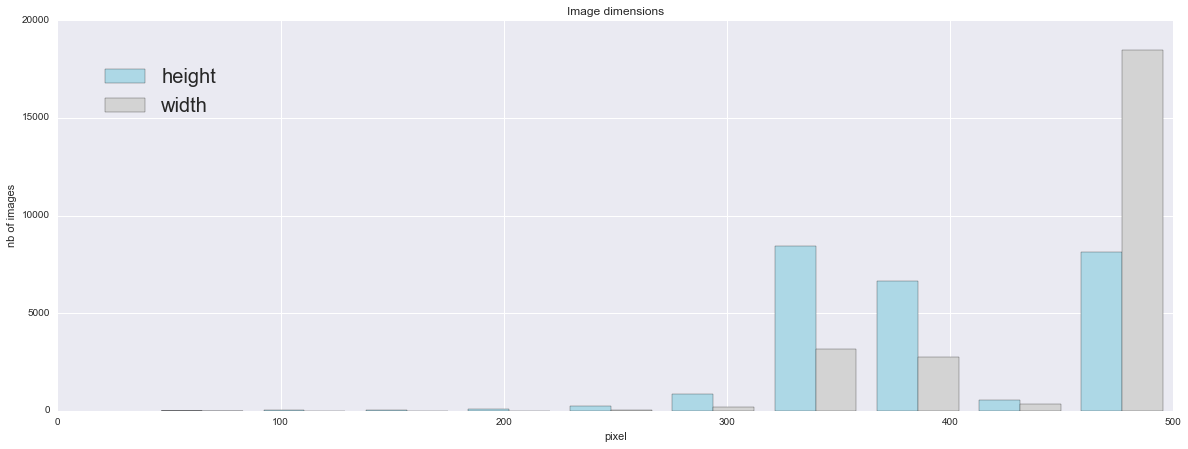

In [23]:
plt.hist([heights, widths], color=['lightblue','lightgrey'], label=['height', 'width'])
plt.legend(prop={'size':20}, loc=0, borderaxespad=2)
plt.ylabel('nb of images')
plt.xlabel('pixel')
plt.title('Image dimensions')

print("Average height : %f" % np.mean(heights))
print("Average width : %f" % np.mean(widths))